In [26]:
# 主要モジュール
import torch
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

# 学習用のサンプルデータ
from sklearn import datasets

# データを整理する
from torch.utils.data import DataLoader

# 全結合層と活性化関数
from torch import nn
from torch.nn import functional as F

# 損失関数と最適化関数
from torch import optim
import pandas as pd

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"run with {device}")

run with cuda


In [28]:
df = pd.read_csv('../clean_database/filtered_labeled_train_dataset.csv', header=None, skiprows=1)

In [29]:
df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,1,AAME,2,0.971175,0.955654,0.975610,0.960089,0.942350,0.920177,0.942350,...,0.691796,0.687361,0.711752,0.678492,0.694013,0.638581,0.616408,0.543237,0.596452,0.620843
1,1,ABCB,6,0.952819,0.938027,0.952098,0.935863,0.931353,0.937486,0.961839,...,0.869479,0.881205,0.887699,0.897440,0.903212,0.906459,0.899403,0.898860,0.930342,0.953139
2,1,ACST,34,0.994444,0.977778,0.966667,0.966667,0.950000,0.961111,1.000000,...,0.616667,0.938889,0.777778,0.744444,0.683333,0.694444,0.694444,0.700000,0.766667,0.794444
3,1,ACXP,37,0.781915,0.801418,0.877660,0.870567,0.852837,0.851064,0.902482,...,0.797872,0.810284,0.842199,0.842199,0.840426,0.808511,0.780142,0.766135,0.801418,0.840426
4,1,AGFY,74,0.849890,0.886534,0.879912,0.811038,0.803532,0.800442,0.797351,...,0.454746,0.433996,0.475938,0.467550,0.400442,0.411921,0.419868,0.406181,0.426490,0.491832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22093,0,CSIQ,604,0.787492,0.794512,0.792385,0.812806,0.798128,0.830674,0.812806,...,0.656243,0.647096,0.667943,0.665603,0.666454,0.663050,0.620294,0.620506,0.633482,0.619017
22094,0,CSPI,605,0.358421,0.365097,0.356752,0.359673,0.359673,0.358838,0.358838,...,0.349241,0.344651,0.364262,0.366766,0.373025,0.372607,0.368018,0.367183,0.362593,0.358004
22095,0,CSSE,606,0.964381,0.964826,1.000000,0.984862,0.975957,0.943900,0.910062,...,0.594835,0.596616,0.622885,0.616207,0.656278,0.638914,0.621995,0.603740,0.614871,0.589047
22096,0,CSTE,607,0.921481,0.908889,0.925926,0.917778,0.909630,0.922963,0.914074,...,0.840142,0.848356,0.843876,0.846863,0.861052,0.894657,0.929010,0.926023,0.905859,0.911087


In [31]:
df.iloc[:, 2:]

,2,3,4,5,6,7,8,9,10,11,...,52,53,54,55,56,57,58,59,60,61
0,2,0.971175,0.955654,0.975610,0.960089,0.942350,0.920177,0.942350,0.929047,0.906874,...,0.691796,0.687361,0.711752,0.678492,0.694013,0.638581,0.616408,0.543237,0.596452,0.620843
1,6,0.952819,0.938027,0.952098,0.935863,0.931353,0.937486,0.961839,0.967251,0.981501,...,0.869479,0.881205,0.887699,0.897440,0.903212,0.906459,0.899403,0.898860,0.930342,0.953139
2,34,0.994444,0.977778,0.966667,0.966667,0.950000,0.961111,1.000000,0.961111,0.933333,...,0.616667,0.938889,0.777778,0.744444,0.683333,0.694444,0.694444,0.700000,0.766667,0.794444
3,37,0.781915,0.801418,0.877660,0.870567,0.852837,0.851064,0.902482,0.886525,0.854610,...,0.797872,0.810284,0.842199,0.842199,0.840426,0.808511,0.780142,0.766135,0.801418,0.840426
4,74,0.849890,0.886534,0.879912,0.811038,0.803532,0.800442,0.797351,0.808830,0.800442,...,0.454746,0.433996,0.475938,0.467550,0.400442,0.411921,0.419868,0.406181,0.426490,0.491832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22093,604,0.787492,0.794512,0.792385,0.812806,0.798128,0.830674,0.812806,0.825144,0.868964,...,0.656243,0.647096,0.667943,0.665603,0.666454,0.663050,0.620294,0.620506,0.633482,0.619017
22094,605,0.358421,0.365097,0.356752,0.359673,0.359673,0.358838,0.358838,0.360090,0.355500,...,0.349241,0.344651,0.364262,0.366766,0.373025,0.372607,0.368018,0.367183,0.362593,0.358004
22095,606,0.964381,0.964826,1.000000,0.984862,0.975957,0.943900,0.910062,0.882903,0.872663,...,0.594835,0.596616,0.622885,0.616207,0.656278,0.638914,0.621995,0.603740,0.614871,0.589047
22096,607,0.921481,0.908889,0.925926,0.917778,0.909630,0.922963,0.914074,0.906667,0.929630,...,0.840142,0.848356,0.843876,0.846863,0.861052,0.894657,0.929010,0.926023,0.905859,0.911087


In [32]:
df = pd.read_csv('../clean_database/filtered_labeled_train_dataset.csv', header=None, skiprows=1)

# 1.DataFrameを説明変数と目的変数に分ける
x = df.iloc[:, 2:]
t = pd.get_dummies(df[0])

# 2.DataFrameをnarrayに変換
x = x.to_numpy().astype("float32")
t = t.to_numpy().astype("float32")

# 3.ndarrayをTensorに変換
x = torch.from_numpy(x).to(device)
t = torch.from_numpy(t).to(device)

# 4.TensorからDatasetを作成
dataset = torch.utils.data.TensorDataset(x, t)

# 6.DataLoaderに変換
batch_size = 20
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [33]:
df = pd.read_csv('../clean_database/labeled_valid_dataset.csv', header=None, skiprows=1)

# 1.DataFrameを説明変数と目的変数に分ける
x = df.iloc[:, 2:]
t = pd.get_dummies(df[0])

# 2.DataFrameをnarrayに変換
x = x.to_numpy().astype("float32")
t = t.to_numpy().astype("float32")

# 3.ndarrayをTensorに変換
x = torch.from_numpy(x).to(device)
t = torch.from_numpy(t).to(device)

# 4.TensorからDatasetを作成
dataset = torch.utils.data.TensorDataset(x, t)

# 6.DataLoaderに変換
batch_size = 20
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [91]:
x

tensor([[ 2.0000,  3.0000,  4.0000,  ..., 58.0000, 59.0000, 60.0000],
        [ 0.9129,  0.9469,  0.9585,  ...,  0.8373,  0.8739,  0.8486],
        [ 0.9016,  0.9043,  0.9115,  ...,  0.8109,  0.8118,  0.8068],
        ...,
        [ 0.5801,  0.5464,  0.5699,  ...,  0.4814,  0.4845,  0.4677],
        [ 0.7647,  0.7068,  0.7023,  ...,  0.6756,  0.6822,  0.6978],
        [ 0.1957,  0.1964,  0.1951,  ...,  0.1047,  0.1053,  0.0969]],
       device='cuda:0')

In [9]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()

        self.rnn = nn.LSTM(input_size = 64,
                            hidden_size = 100,
                            batch_first = True)
        self.output_layer = nn.Linear(20, 2)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, inputs, hidden0=None):
        output, (hidden, cell) = self.rnn(inputs, hidden0) #LSTM層
        output = self.output_layer(output[:, -1]) 
        return output

In [34]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size, num_classes)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, x, hidden0=None):        
        # Forward pass
        out, (hidden, cell) = self.lstm(x, hidden0)
        # Index hidden state of last time step
        out = self.fc(out)
        return out

In [35]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # 全結合層を6つに増やす
        self.fc1 = nn.Linear(64, 32)
        self.dropout1 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc2 = nn.Linear(32, 64)
        self.dropout2 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc3 = nn.Linear(64, 64)
        self.dropout3 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc4 = nn.Linear(64, 64)
        self.dropout4 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc5 = nn.Linear(64, 32)
        self.dropout5 = nn.Dropout(0.3)  # ドロップアウトを追加
        self.fc6 = nn.Linear(32, 2)

        # 損失関数と最適化関数
        self.criterion = nn.CrossEntropyLoss()
        self.criterion_2 = nn.HingeEmbeddingLoss()
        self.optimizer = optim.Adam(self.parameters())

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)  # ドロップアウトを適用
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout2(x)  # ドロップアウトを適用
        x = self.fc3(x)
        x = F.relu(x)
        x = self.dropout3(x)  # ドロップアウトを適用
        x = self.fc4(x)
        x = F.relu(x)
        x = self.dropout4(x)  # ドロップアウトを適用
        x = self.fc5(x)
        x = F.relu(x)
        x = self.dropout5(x)  # ドロップアウトを適用
        x = self.fc6(x)
        return x

In [36]:
def train(model, data_loader):
    # 今は学習時であることを明示するコード
    model.train()

    # 正しい予測数、全体のデータ数を数えるカウンターの0初期化
    total_correct = 0
    total_data_len = 0

    loss_mean = 0


    # ミニバッチごとにループさせる,train_loaderの中身を出し切ったら1エポックとなる
    for j, (x, t) in enumerate(data_loader):
        y = model(x)  # 順伝播

        model.optimizer.zero_grad()  # 勾配を初期化（前回のループ時の勾配を削除）
        loss = model.criterion(y, t)  # 損失関数を計算
        loss.backward()  # 逆伝播で勾配を計算
        model.optimizer.step()  # 最適化

        loss_mean += loss.item()

        # ミニバッチごとの正答率と損失を求める
        _, index_y = torch.max(y, axis=1)  # 最も確率が高いと予測したindex
        _, index_t = torch.max(t, axis=1)  # 正解のindex
        for i in range(len(t)):  # データ一つずつループ,ミニバッチの中身出しきるまで
            total_data_len += 1  # 全データ数を集計
            if index_y[i] == index_t[i]:
                total_correct += 1 # 正解のデータ数を集計

    loss_mean = loss_mean / (j+1)

    return total_correct, total_data_len, loss_mean

In [37]:
def test(model, data_loader):
    # モデルを評価モードにする
    model.eval()

    # 正しい予測数、全体のデータ数を数えるカウンターの0初期化
    total_data_len = 0
    total_correct = 0

    loss_mean = 0

    for j, (x, t) in enumerate(data_loader):
        y = model(x)  # 順伝播（=予測）
        loss = model.criterion(y, t)  # 損失を計算
        loss_mean += loss.item()

        # ミニバッチごとの正答率と損失を求める
        _, index_y = torch.max(y, axis=1)  # 最も確率が高いと予測したindex
        _, index_t = torch.max(t, axis=1)  # 正解のindex
        for i in range(len(t)):  # データ一つずつループ,ミニバッチの中身出しきるまで
            total_data_len += 1  # 全データ数を集計
            if index_y[i] == index_t[i]:
                total_correct += 1 # 正解のデータ数を集計

    loss_mean = loss_mean / (j+1)

    return total_correct, total_data_len, loss_mean

In [38]:
# アーキテクチャのインスタンス作成
# model = Net().to(device)

input_size = 60
# hidden_size = 2
# num_layers = 3
hidden_size = 4
num_layers = 4
num_classes = 2

# Create the model
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes).to(device)

epochs = 500
record_train_loss = []
record_test_loss = []
for epoch in range(epochs):
    train_correct_len, train_data_len, train_loss = train(model, train_loader)
    test_correct_len, test_data_len, test_loss = test(model, test_loader)

    train_acc = train_correct_len/train_data_len*100
    test_acc = test_correct_len/test_data_len*100

    record_train_loss.append(train_loss)
    record_test_loss.append(test_loss)
    # 重みとバイアスのみ保存
    torch.save(model.state_dict(), f'./weights/model_weight_train_loss_{train_loss:.5f}_test_loss_{test_loss:.5f}_epoch_{epoch}.pth')

    print(f"epoch={epoch}, train:{train_correct_len}/{train_data_len}({train_acc:.2f}%), {train_loss:.5f}, test:{test_correct_len}/{test_data_len}({test_acc:.2f}%), {test_loss:.5f}")


epoch=0, train:11034/22098(49.93%), 0.69346, test:3212/357615(0.90%), 0.70071
epoch=1, train:11129/22098(50.36%), 0.69328, test:3212/357615(0.90%), 0.71038
epoch=2, train:11053/22098(50.02%), 0.69342, test:336866/357615(94.20%), 0.67617
epoch=3, train:11110/22098(50.28%), 0.69327, test:3212/357615(0.90%), 0.71456
epoch=4, train:11033/22098(49.93%), 0.69337, test:336858/357615(94.20%), 0.68341
epoch=5, train:11089/22098(50.18%), 0.69325, test:3212/357615(0.90%), 0.72139
epoch=6, train:11031/22098(49.92%), 0.69334, test:3212/357615(0.90%), 0.71339
epoch=7, train:11033/22098(49.93%), 0.69329, test:336860/357615(94.20%), 0.68741
epoch=8, train:11132/22098(50.38%), 0.69324, test:3212/357615(0.90%), 0.72473
epoch=9, train:10955/22098(49.57%), 0.69336, test:3212/357615(0.90%), 0.69825
epoch=10, train:10936/22098(49.49%), 0.69333, test:336844/357615(94.19%), 0.69202
epoch=11, train:11039/22098(49.95%), 0.69330, test:3212/357615(0.90%), 0.70326
epoch=12, train:10978/22098(49.68%), 0.69330, test

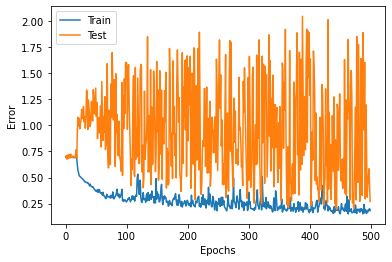

In [39]:
plt.plot(range(len(record_train_loss)), record_train_loss, label="Train")
plt.plot(range(len(record_test_loss)), record_test_loss, label="Test")
plt.legend()

# plt.xlim(0,100)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

[0.6943001136631117,
 0.6933093541075946,
 0.693301909239683,
 0.663904946099528,
 0.5069686463124207,
 0.4684002678540232,
 0.4353858014314885,
 0.39914339665521376,
 0.3605155191162717,
 0.32142360911083,
 0.28355591298741295,
 0.24788539762464598,
 0.21214084008033227,
 0.18855745206731125,
 0.17967212647543768,
 0.153263728444058,
 0.13714217324741185,
 0.12395301303615489,
 0.11985661709244529,
 0.11001625184161162,
 0.11446037368663946,
 0.09694679795444984,
 0.08882202314375308,
 0.09583590434343656,
 0.09663792852931774,
 0.08693780967461345,
 0.07327628139472044,
 0.0774329305001627,
 0.07382300295936929,
 0.07733076915986982,
 0.064204234887435,
 0.07380733728672563,
 0.07519813455607931,
 0.06453922995531235,
 0.07020703555958821,
 0.06145526849879565,
 0.06518458196203446,
 0.06175539743434315,
 0.05932088548622167,
 0.072132386413847,
 0.06121455829826616,
 0.05644595064323634,
 0.06787002372744173,
 0.05240132776478856,
 0.05616077859122435,
 0.05779918155126923,
 0.05758

In [23]:
import csv

# 2つのリストを定義する
list1 = record_train_loss
list2 = record_test_loss

# CSVファイルに書き込む
with open('output_2023_10_18.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['list1', 'list2'])
    for i in range(len(list1)):
        writer.writerow([list1[i], list2[i]])

In [ ]:
# 2.DataFrameをnarrayに変換
x = x.to_numpy().astype("float32")
t = t.to_numpy().astype("float32")

# 3.ndarrayをTensorに変換
x = torch.from_numpy(x).to(device)
t = torch.from_numpy(t).to(device)

# tの種類によってtrain_datasetとtest_datasetを作成する
t_unique = torch.unique(t)
train_dataset_list = []
test_dataset_list = []

r = 0.9

for t_val in t_unique:
    # t_valに対応するxのインデックスを取得
    idx = torch.where(t[:, 1] == t_val)
    # xとtを取得
    x_t = x[idx]
    t_t = t[idx]
    # TensorDatasetを作成
    dataset_t = torch.utils.data.TensorDataset(x_t, t_t)
    # データセットを分割
    train_dataset_t, test_dataset_t = torch.utils.data.random_split(dataset_t, [r, 1-r])
    # リストに追加
    train_dataset_list.append(train_dataset_t)
    test_dataset_list.append(test_dataset_t)

# train_datasetとtest_datasetを作成
train_dataset = torch.utils.data.ConcatDataset(train_dataset_list)
test_dataset = torch.utils.data.ConcatDataset(test_dataset_list)

# 6.DataLoaderに変換
batch_size = 20
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)